In [68]:
from covid19dh import covid19
import covsirphy as cs
import numpy as np
import pandas as pd
import datetime


Obtain the list as formatted in the input data

In [2]:
data_loader     = cs.DataLoader("input")
# (Main) Data
jhu_data        = data_loader.jhu()
jhu_data.records(country = "Italy")
# (Main) Population in each country
population_data = data_loader.population()


data            = pd.read_csv("input/covid19dh.csv", low_memory = False)
data_italy      = data[data.ISO3 == 'ITA'] 
provinces_list  = data_italy.loc[:,"Province/State"].dropna().unique().tolist()
provinces_list

['Friuli Venezia Giulia',
 'P.A. Bolzano',
 'Molise',
 'Campania',
 'Veneto',
 'Basilicata',
 'Lazio',
 'Lombardia',
 'P.A. Trento',
 'Piemonte',
 "Valle d'Aosta",
 'Sicilia',
 'Marche',
 'Calabria',
 'Liguria',
 'Umbria',
 'Emilia-Romagna',
 'Abruzzo',
 'Puglia',
 'Toscana',
 'Sardegna']

# National Scenario Analysis

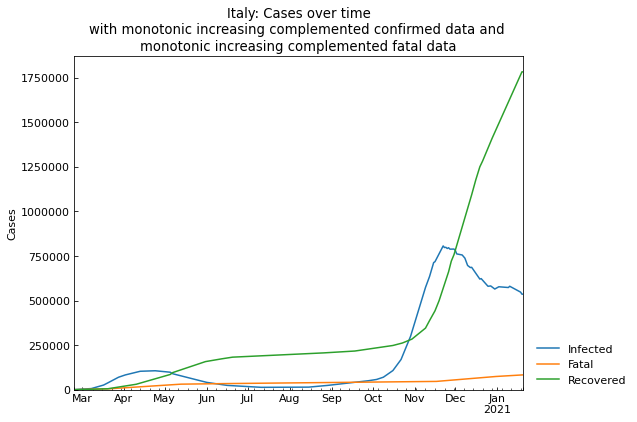

,Date,Infected,Fatal,Recovered
0,2020-02-24,221,7,1
1,2020-02-25,311,10,1
2,2020-02-26,385,12,3
3,2020-02-27,587,17,45
4,2020-02-28,820,21,46
...,...,...,...,...
327,2021-01-16,557717,81800,1729216
328,2021-01-17,553374,82177,1745726
329,2021-01-18,547059,82554,1760489
330,2021-01-19,535524,83157,1781917


In [22]:
National_scenario = cs.Scenario(jhu_data, population_data, country="Italy", province= None, tau=1440)
record_df = National_scenario.records()
record_df

In [23]:
# Clear all phases
National_scenario.clear(include_past=True).summary()
National_scenario.summary()

""


In [24]:
# Set 0th phase to set the start date of 1st phase
National_scenario.add(end_date="27Feb2020")
# Add 1st phase and disable 0th phase
National_scenario.add(end_date="10Mar2020")#.disable(phases=["0th"])
# Add 2nd phase
National_scenario.add(end_date="18May2020")
# Add 3rd phase
National_scenario.add(end_date="03Nov2020")
# Add 4th phase
National_scenario.add(end_date="22Dec2020")
# Add 5th phase
National_scenario.add(end_date="10Jan2021")
# Add 6th phase to the last of the records
National_scenario.add().summary()

,Type,Start,End,Population,tau
0th,Past,24Feb2020,27Feb2020,60421760,1440
1st,Past,28Feb2020,10Mar2020,60421760,1440
2nd,Past,11Mar2020,18May2020,60421760,1440
3rd,Past,19May2020,03Nov2020,60421760,1440
4th,Past,04Nov2020,22Dec2020,60421760,1440
5th,Past,23Dec2020,10Jan2021,60421760,1440
6th,Past,11Jan2021,20Jan2021,60421760,1440


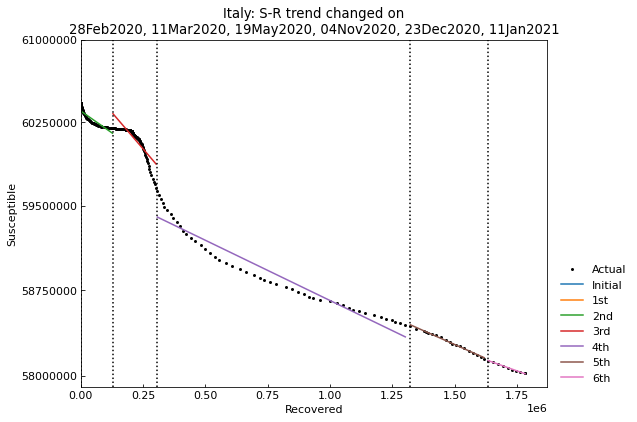

In [25]:
National_scenario.trend(force = False)

In [16]:
National_scenario.disable(phases=["3rd"])
National_scenario.summary()

,Type,Start,End,Population
1st,Past,28Feb2020,10Mar2020,60421760
2nd,Past,11Mar2020,18May2020,60421760
4th,Past,04Nov2020,22Dec2020,60421760
5th,Past,23Dec2020,10Jan2021,60421760
6th,Past,11Jan2021,20Jan2021,60421760


In [26]:
National_scenario.estimate(cs.SIR)
National_scenario.summary()


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 0th phase (11Jan2021 - 20Jan2021): finished  168 trials in 0 min 10 sec
	 3rd phase (28Feb2020 - 10Mar2020): finished 1789 trials in 3 min  1 sec
	 1st phase (19May2020 - 03Nov2020): finished 1774 trials in 3 min  1 sec
	 2nd phase (11Mar2020 - 18May2020): finished 1776 trials in 3 min  1 sec
	 4th phase (04Nov2020 - 22Dec2020): finished 1790 trials in 3 min  1 sec
	 6th phase (23Dec2020 - 10Jan2021): finished  196 trials in 0 min 10 sec
	 5th phase (24Feb2020 - 27Feb2020): finished 3255 trials in 3 min  0 sec
Completed optimization. Total: 6 min  3 sec


,Type,Start,End,Population,ODE,Rt,rho,sigma,tau,1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,24Feb2020,27Feb2020,60421760,SIR,13.57,0.339427,0.025017,1440,2,39,0.205031,3255,3 min 0 sec
1st,Past,28Feb2020,10Mar2020,60421760,SIR,5.97,0.233515,0.039144,1440,4,25,0.168412,1789,3 min 1 sec
2nd,Past,11Mar2020,18May2020,60421760,SIR,2.29,0.054497,0.023797,1440,18,42,0.836841,1776,3 min 1 sec
3rd,Past,19May2020,03Nov2020,60421760,SIR,0.81,0.014526,0.017911,1440,68,55,0.618930,1774,3 min 1 sec
4th,Past,04Nov2020,22Dec2020,60421760,SIR,1.49,0.044786,0.030052,1440,22,33,0.140573,1790,3 min 1 sec
5th,Past,23Dec2020,10Jan2021,60421760,SIR,0.91,0.026891,0.029542,1440,37,33,0.010479,196,0 min 10 sec
6th,Past,11Jan2021,20Jan2021,60421760,SIR,0.79,0.026334,0.033212,1440,37,30,0.003334,168,0 min 10 sec


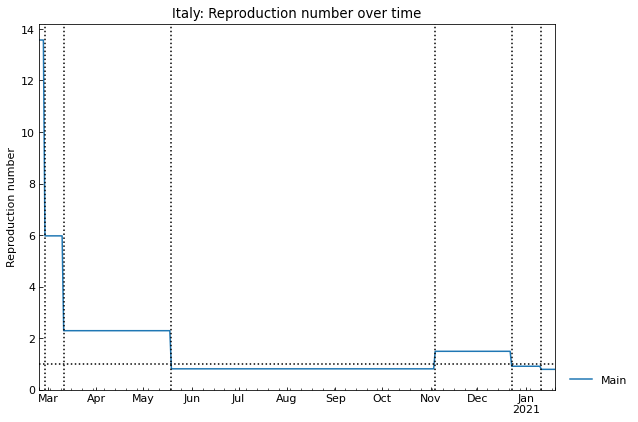

In [27]:
# Scenario.history() method shows the trajectories of parameters (and the number of cases).
National_Rt = National_scenario.history(target="Rt")

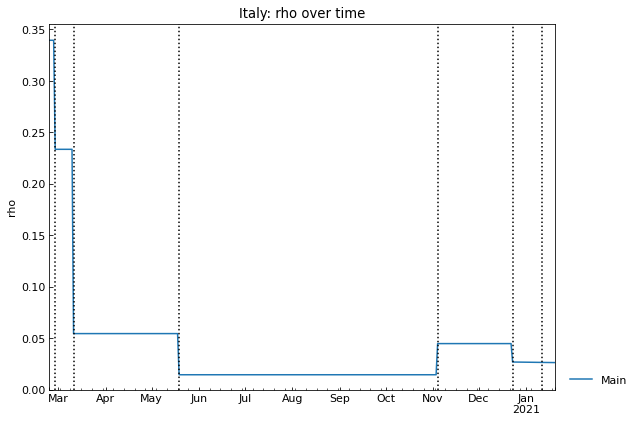

In [28]:
# Scenario.history() method shows the trajectories of parameters (and the number of cases).
National_Rt = National_scenario.history(target="rho")

# Now do the same, but for different regions

It is done by the mean of a dictionary with:
+ key: id of the region
+ value: name of the region

In [34]:
scenarios_list = []
province_dict = {}

for i, province in enumerate(provinces_list):
    province_dict.update({i : province})
    scenarios_list.append(cs.Scenario(jhu_data, population_data, country="Italy",
                                      province = province, tau=1440))
province_dict

{0: 'Friuli Venezia Giulia',
 1: 'P.A. Bolzano',
 2: 'Molise',
 3: 'Campania',
 4: 'Veneto',
 5: 'Basilicata',
 6: 'Lazio',
 7: 'Lombardia',
 8: 'P.A. Trento',
 9: 'Piemonte',
 10: "Valle d'Aosta",
 11: 'Sicilia',
 12: 'Marche',
 13: 'Calabria',
 14: 'Liguria',
 15: 'Umbria',
 16: 'Emilia-Romagna',
 17: 'Abruzzo',
 18: 'Puglia',
 19: 'Toscana',
 20: 'Sardegna'}

In [77]:
min_date_list_str = []
min_date_datetime_list = []

for i, prov in enumerate(provinces_list):
    min_date_list.append(scenarios_list[i].first_date)
    min_date_datetime_list.append(datetime.datetime.strptime(scenarios_list[i].first_date, '%d%b%Y'))
    print(scenarios_list[i].first_date, " :  ", province_dict.get(i))
print("\n")

min_date_datetime = max(min_date_datetime_list)
min_date_str      = min_date_list[min_date_datetime_list.index(min_date_datetime)]

print("Lates data collected is:", min_date_datetime , "---> ", province_dict.get(min_date_datetime_list.index(min_date_datetime)))

06Mar2020  :   Friuli Venezia Giulia
15Mar2020  :   P.A. Bolzano
16Mar2020  :   Molise
08Mar2020  :   Campania
03Mar2020  :   Veneto
26Mar2020  :   Basilicata
24Feb2020  :   Lazio
27Feb2020  :   Lombardia
10Mar2020  :   P.A. Trento
19Mar2020  :   Piemonte
19Mar2020  :   Valle d'Aosta
27Feb2020  :   Sicilia
21Mar2020  :   Marche
09Mar2020  :   Calabria
29Feb2020  :   Liguria
11Mar2020  :   Umbria
03Mar2020  :   Emilia-Romagna
12Mar2020  :   Abruzzo
04Mar2020  :   Puglia
28Feb2020  :   Toscana
16Mar2020  :   Sardegna


Lates data collected is: 2020-03-26 00:00:00 --->  Basilicata


In [35]:
def FIT_SIR_scenario(scenario, phases_manually):
    # Clear all phases
    scenario.clear(include_past=True).summary()
    scenario.summary()
    
    if (len(phases_manually) == 0):
        snl.trend(set_phases=True)
    else:
        #if a list of phases bounds is present then use it
        for phase_end in phases_manually:
            scenario.add(end_date=phase_end)
        #add the last scenario
        scenario.add()
        
    #use the estimate object to fit the SIR parameters
    scenario.estimate(cs.SIR)
    
    return scenario

In [40]:
phases_list = ["27Feb2020", "10Mar2020" , "18May2020" , "03Nov2020" , "22Dec2020" , "10Jan2021"]
phases_list_regions = ["18May2020" , "03Nov2020" , "22Dec2020" , "10Jan2021"]

In [45]:
# for i in range(provinces_list):
import os
os.makedirs('results/', exist_ok = True)

for i in range(2):
    
    print("For province: ", province_dict.get(i))
    
    FIT_SIR_scenario(scenarios_list[i], phases_list_regions)
    scenarios_list[i].summary().to_csv('results/'+str(province_dict.get(i))+'.csv')
    
    print("Done for province: ", province_dict.get(i))
    print("\n\n")

For province:  Friuli Venezia Giulia

<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 0th phase (11Jan2021 - 20Jan2021): finished  175 trials in 0 min 10 sec
	 3rd phase (06Mar2020 - 10Mar2020): finished 1942 trials in 3 min  1 sec
	 2nd phase (11Mar2020 - 18May2020): finished 1936 trials in 3 min  1 sec
	 1st phase (19May2020 - 03Nov2020): finished 1917 trials in 3 min  1 sec
	 4th phase (04Nov2020 - 22Dec2020): finished 1966 trials in 3 min  1 sec
	 5th phase (23Dec2020 - 10Jan2021): finished 3316 trials in 3 min  0 sec
Completed optimization. Total: 6 min  2 sec
Done for province:  Friuli Venezia Giulia



For province:  P.A. Bolzano


ValueError: @end_date must be over 14Mar2020. However, 10Mar2020 was applied.